In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'HH (Diagonal Detail)')

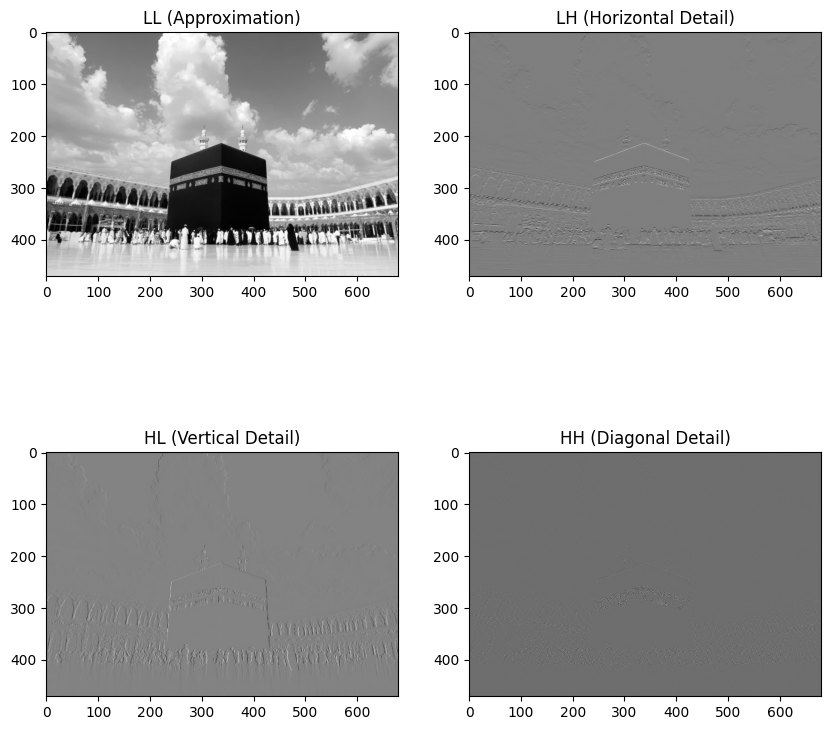

In [7]:
img = plt.imread("Assets/masjid_al_haram.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def padding_horizontal(image):
    height, width = image.shape
    img_pad = np.zeros((height, width + 1))
    img_pad[:, :width] = image
    return img_pad

def padding_vertical(image):
    height, width = image.shape
    img_pad = np.zeros((height + 1, width))
    img_pad[:height, :] = image
    return img_pad

def convo_horizontal(padding, kernel):
    height, width = padding.shape[0], padding.shape[1] - 1
    result = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            result[i][j] = np.sum(kernel * padding[i, j:j+2])
    return result

def convo_vertical(padding, kernel):
    height, width = padding.shape[0] - 1, padding.shape[1]
    result = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            result[i][j] = np.sum(kernel * padding[i:i+2, j])
    return result

def downsample_horizontal(image):
    return image[::2, :]

def downsample_vertical(image):
    return image[:, ::2]

def wavelet_decom(image, filter1, filter2):
    pad_h = padding_horizontal(image)
    conv_h = convo_horizontal(pad_h, filter1)
    ds_v = downsample_vertical(conv_h)

    pad_v = padding_vertical(ds_v)
    conv_v = convo_vertical(pad_v, filter2)
    ds_h = downsample_horizontal(conv_v)

    return ds_h

Low_pass_filter = np.array([1/np.sqrt(2), 1/np.sqrt(2)]) 
High_pass_filter = np.array([1/np.sqrt(2), -1/np.sqrt(2)])  

LL_component = wavelet_decom(img, Low_pass_filter, Low_pass_filter)
LH_component = wavelet_decom(img, Low_pass_filter, High_pass_filter)
HL_component = wavelet_decom(img, High_pass_filter, Low_pass_filter)
HH_component = wavelet_decom(img, High_pass_filter, High_pass_filter)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(LL_component, cmap='gray')
plt.title("LL (Approximation)")

plt.subplot(2,2,2)
plt.imshow(LH_component, cmap='gray')
plt.title("LH (Horizontal Detail)")

plt.subplot(2,2,3)
plt.imshow(HL_component, cmap='gray')
plt.title("HL (Vertical Detail)")

plt.subplot(2,2,4)
plt.imshow(HH_component, cmap='gray')
plt.title("HH (Diagonal Detail)")